In [1]:
import os
import pickle
from dypac import Dypac
from niak_load_confounds import load_confounds #for fmriprep: from load_confounds import load_confounds
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr

Here we will desigate the paths to the functional data and confound files.

In [2]:
path_base = '/home/lussier/Projects/data/simon/'
path_func = 'minimally_preprocessed/'
path_conf = 'minimally_preprocessed/'

We will also load an atlas for probabilistic grey matter segmentation.

In [3]:
mni = datasets.fetch_icbm152_2009()

A text file in the functional folder containing the names of the functional files in a single column is used to generate the list for the dypac model.

In [4]:
func = []
func_file = open((os.path.join(path_base,path_func, 'functional.txt')),'r')
for line in func_file:
    func.append(os.path.join(path_base,path_func, (line.strip())))
func_file.close()
print (func)

['/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess005_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun2_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess013_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess014_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess015_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess016_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess017_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess018_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preproces

A similar text file with the names of the confounds files in the same order as the functional is used to create the confounds file list for the model.

In [5]:
conf_list = []
conf_file = open((os.path.join(path_base,path_conf, 'confounds.txt')),'r')
for line in conf_file:
    conf_list.append(os.path.join(path_base,path_conf, (line.strip())))
conf_file.close()
print (conf_list)

['/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess005_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun2_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess013_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess014_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess015_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess016_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess017_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess01

We now load the confounds from the list. 

In [6]:
conf = []
for idx in conf_list:
    conf.append(load_confounds(idx))
conf

[     motion_pca_1  motion_pca_2  motion_pca_3  motion_pca_4  slow_drift  \
 0        0.160214     -0.135278     -0.103035     -0.030978    1.400780   
 1        0.081142     -0.141345     -0.111912      0.035179    1.400498   
 2        0.042224     -0.127816     -0.047258     -0.006761    1.399652   
 3        0.049902     -0.079795     -0.072379     -0.020883    1.398241   
 4        0.109512     -0.084726     -0.058999      0.000153    1.396267   
 ..            ...           ...           ...           ...         ...   
 152     -0.134342      0.027961      0.065475      0.018933   -1.411689   
 153     -0.066477      0.119334     -0.064057      0.004813   -1.414226   
 154     -0.053544      0.101116     -0.059510      0.005756   -1.416200   
 155     -0.079907      0.077248     -0.060330      0.060057   -1.417610   
 156     -0.100087      0.096562     -0.029034      0.058106   -1.418457   
 
      slow_drift.1  slow_drift.2  slow_drift.3  slow_drift.4  slow_drift.5  \
 0      

Now we run dypac. If you already have a saved model that you would like to load instead, skip down. First we specify the model, with the main relevant options. Then we fit the model on the functional data.

In [7]:
model = Dypac(subsample_size=30, n_clusters=50, grey_matter=mni.gm, n_states=150, 
              verbose=1, n_init=1, n_init_aggregation=1, n_replications=20, detrend=True, 
              smoothing_fwhm=5, standardize=True, n_batch=2, threshold_sim=0.2)
model.fit(func, confounds=conf)

[MultiNiftiMasker.fit] Loading data from [/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess005_taskrestrun1_n.nii.gz, /home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun1_n.n
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Dypac] Restrict brain mask to grey matter
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Dypac] Processing batch 0
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess005_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 20/20 [00:55<00:00,  2.77s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 20/20 [00:56<00:00,  2.84s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess014_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 20/20 [00:54<00:00,  2.73s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess016_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 20/20 [01:00<00:00,  3.01s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess018_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 20/20 [00:59<00:00,  2.95s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess020_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 20/20 [00:59<00:00,  2.97s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess022_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 20/20 [01:25<00:00,  4.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess024_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 20/20 [01:37<00:00,  4.86s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess026_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 20/20 [01:32<00:00,  4.64s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess027_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess031_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess035_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess036_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess036_taskrestrun4_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess037_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess039_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess041_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess043_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess044_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess045_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess046_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess046_taskrestrun3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess048_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess051_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess052_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess054_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess056_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess058_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess060_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess061_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess063_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess065_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess067_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess068_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess070_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess072_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


Consensus clustering.


Trimming states: 100%|██████████| 150/150 [00:03<00:00, 44.12it/s]


[Dypac] Processing batch 1
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 20/20 [00:14<00:00,  1.43it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess013_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess015_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess017_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess019_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess021_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess023_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess025_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess027_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess030_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 20/20 [00:15<00:00,  1.25it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess032_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess036_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess036_taskrestrun3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess036_taskrestrun5_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess038_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess040_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess042_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess044_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess044_taskrestrun3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess045_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 20/20 [00:15<00:00,  1.26it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess046_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess047_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess050_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess051_taskrestrun2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess053_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess055_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess057_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess059_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess061_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess062_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess064_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess066_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess068_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


/usr/local/lib/python3.6/dist-packages/dypac/bascpp.py:137: UserWarning: 20 replications were requested, but only 11 available.
  n_replications, list_start.shape[0]
Replicating clusters in data #32:   0%|          | 0/11 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 11/11 [00:08<00:00,  1.27it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess069_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess071_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess073_taskrestrun1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


Consensus clustering.


Trimming states: 100%|██████████| 150/150 [00:03<00:00, 39.69it/s]


Inter-batch consensus
Generating consensus stability maps


Dypac(grey_matter='/home/lussier/nilearn_data/icbm152_2009/mni_icbm152_nlin_sym_09a/mni_icbm152_gm_tal_nlin_sym_09a.nii.gz',
      mask=<nibabel.nifti1.Nifti1Image object at 0x7f8ad4096fd0>,
      memory_level=1, n_batch=2, n_clusters=50, n_init=1, n_init_aggregation=1,
      n_replications=20, n_states=150,
      random_state=RandomState(MT19937) at 0x7F8AF0120570, smoothing_fwhm=5,
      threshold_sim=0.2)

Save the model as a pickle file.

In [8]:
pickle.dump(model, open("Dypac_simon_pass_sub30clu50sta150bat2smo5thr02.pickle", "wb"))

If there is a model already saved that we will be looking at instead, it can be loaded here.

In [7]:
file = open("Dypac_simon_pass_sub30clu50sta150bat2smo5thr02.pickle", "rb")
model = pickle.load(file)

Visualize components maps.


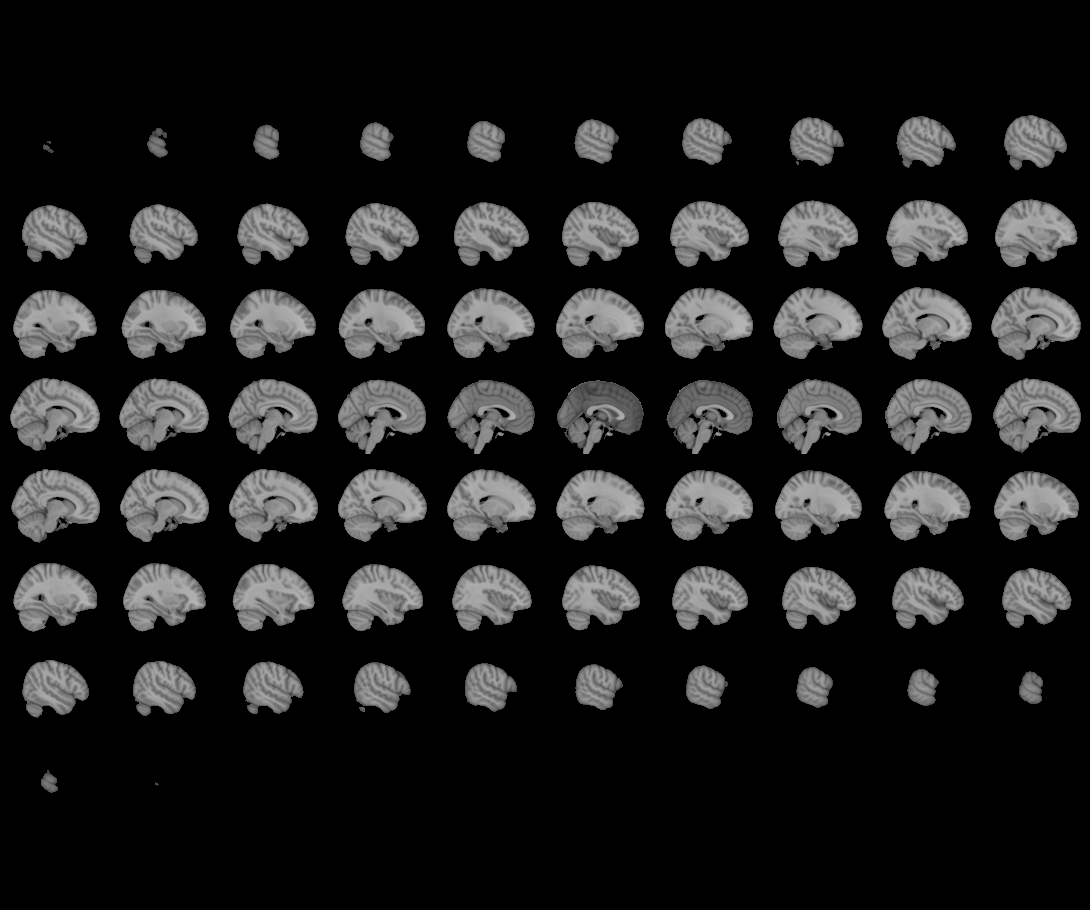
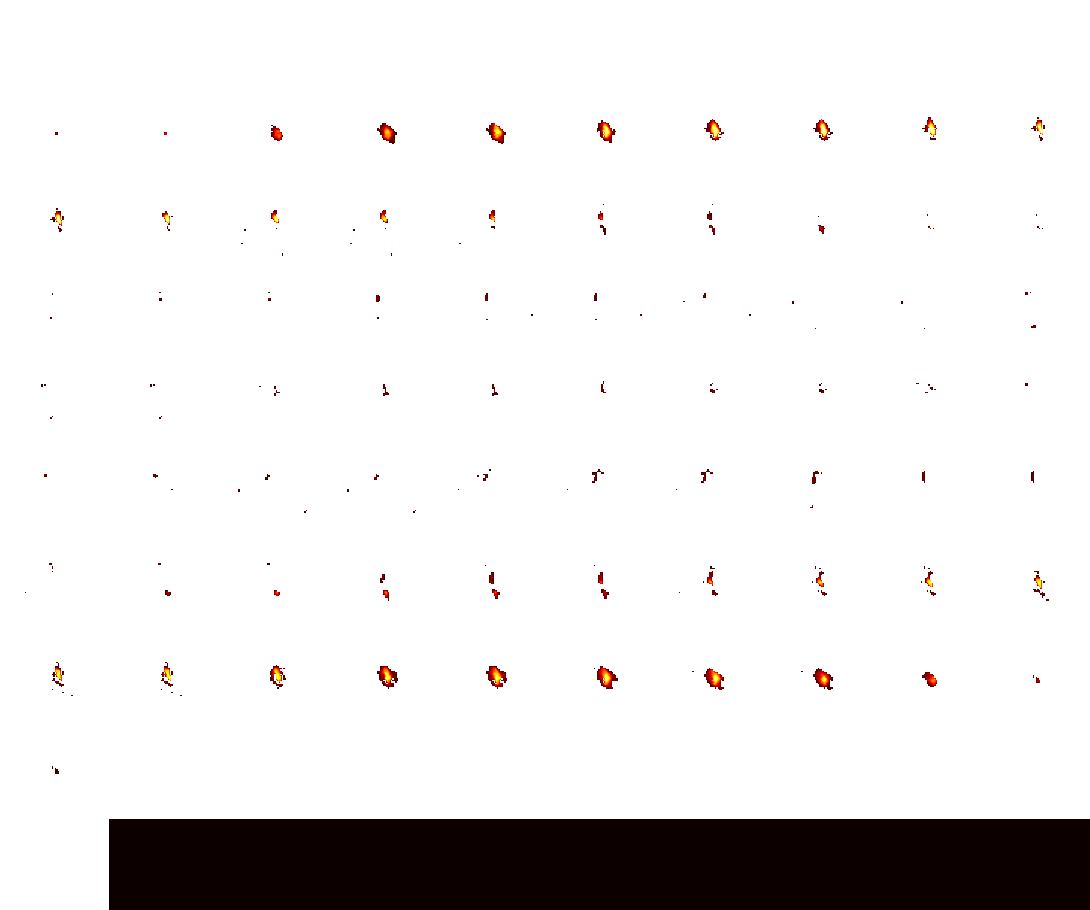

In [8]:
num_comp = 0 # the component number
comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
plotting.view_img(comp, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

We can project the data of one subject in the parcellation space, and visualize the time course of a parcel. Note that we shift the component index, because the first coefficient of the parcellation space corresponds to the intercept, which is not included in `components_`.

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/abide/func/fmri_sub0050004_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


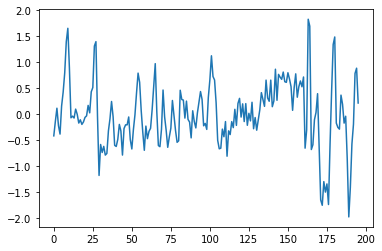

In [9]:
num_s = 0 # the subject number
weights = model.transform(func[num_s])
plt.plot(weights[:, num_comp + 1])

Let's now visualize one volume of the 4D data (after preprocessing is applied):

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/abide/func/fmri_sub0050004_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals



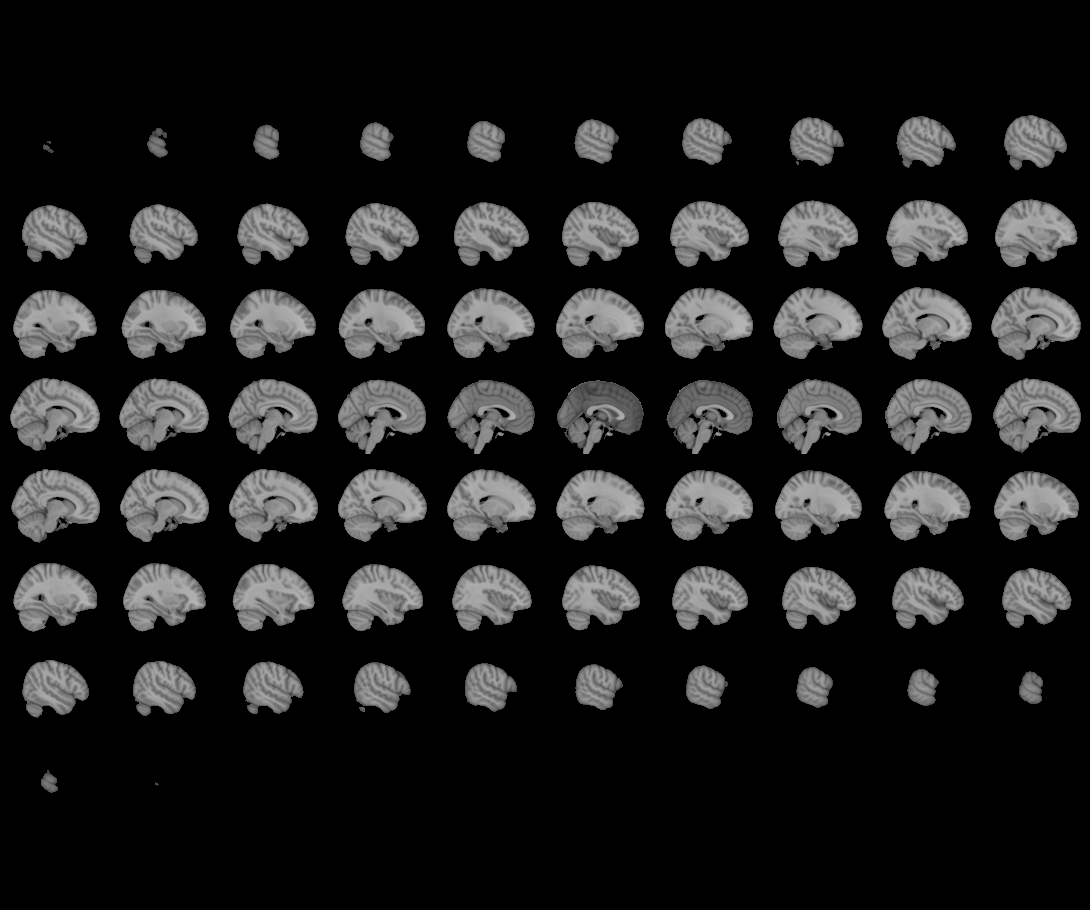
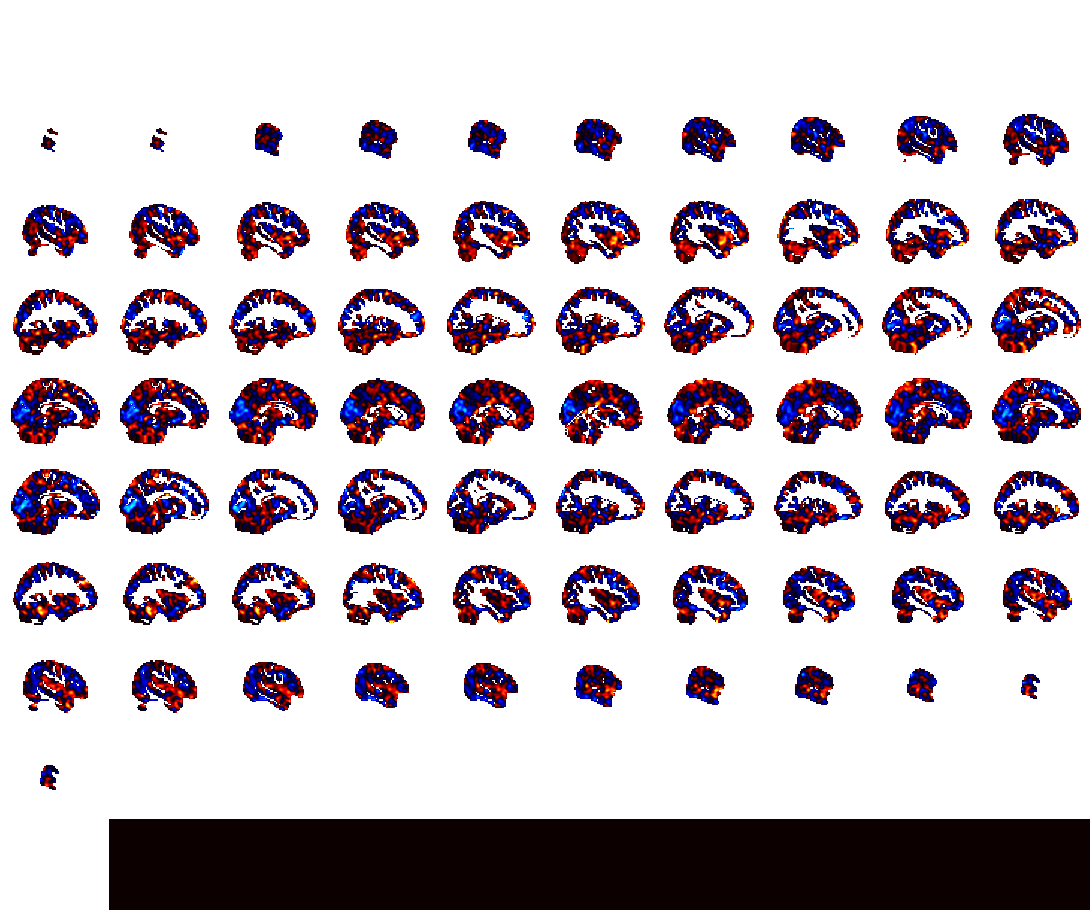

In [10]:
num_t = 0 # the frame number
img = model.load_img(func[num_s])
plotting.view_img(image.index_img(img, [num_t]), vmax=4)

We can compress the data in the parcellation space, to look if the approximation is accurate.

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(53, 64, 52, 196),
affine=array([[   3.,    0.,    0.,  -78.],
       [   0.,    3.,    0., -112.],
       [   0.,    0.,    3.,  -68.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals



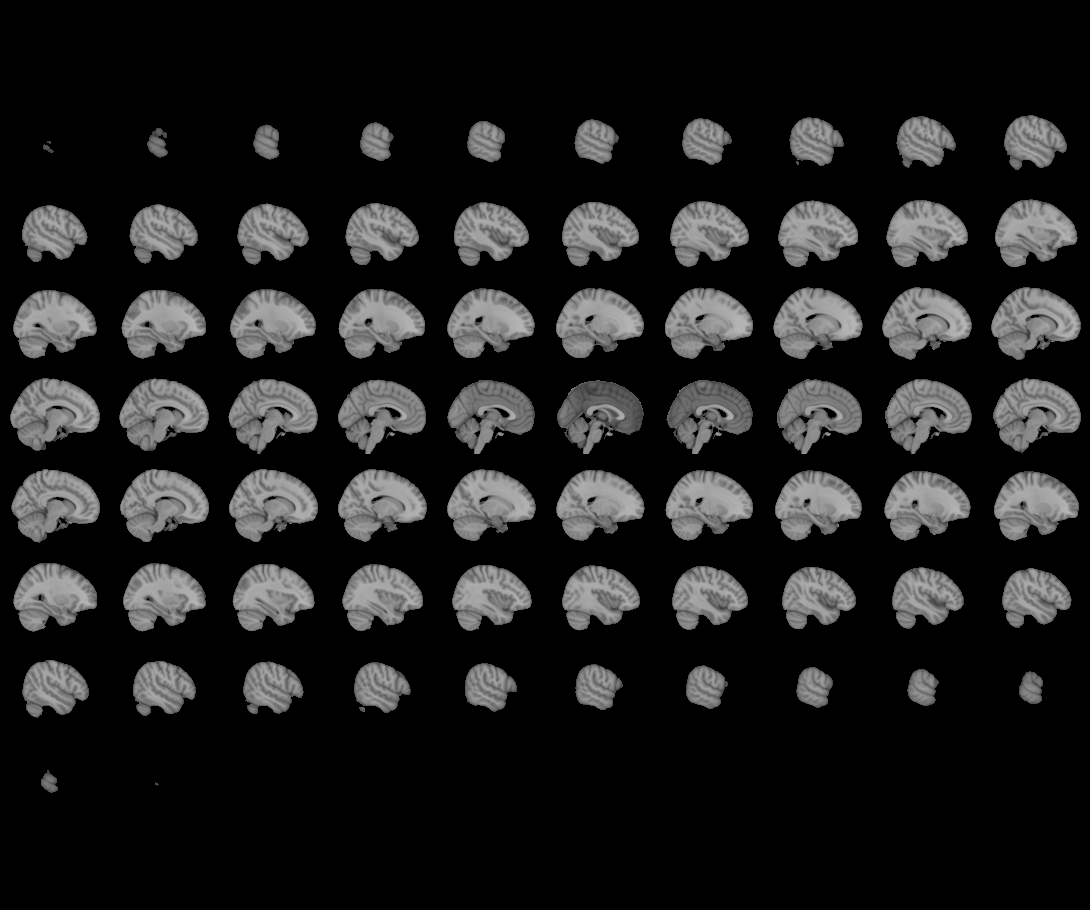
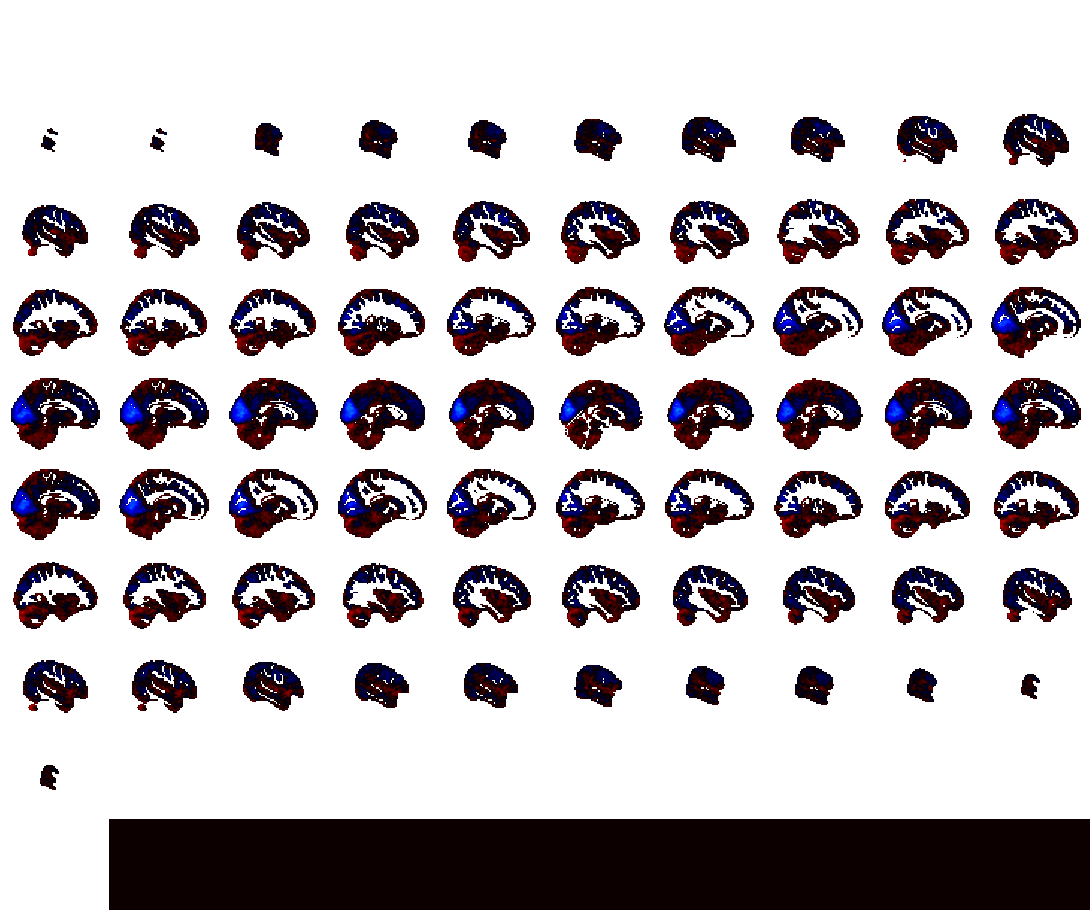

In [11]:
img_r = model.compress(img)
plotting.view_img(image.index_img(img_r, [num_t]), vmax=4)

It is possible to generate a R2 map, which quantifies the quality of this embedding. It computes the fraction of the variance of fMRI time series captured by the parcels. A score of 1 means perfect approximation. The score can be negative, in which case the parcellation approximation performs worst than the average of the signal. 

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(53, 64, 52, 196),
affine=array([[   3.,    0.,    0.,  -78.],
       [   0.,    3.,    0., -112.],
       [   0.,    0.,    3.,  -68.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals



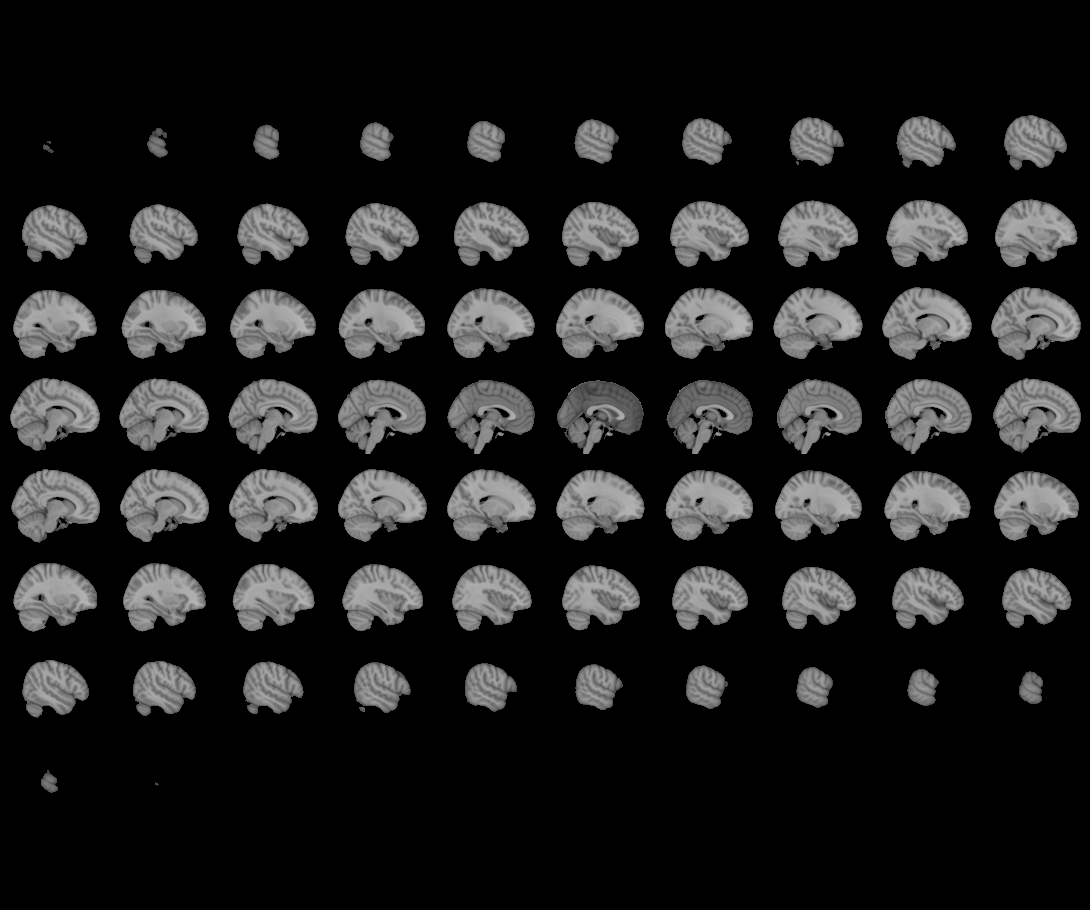
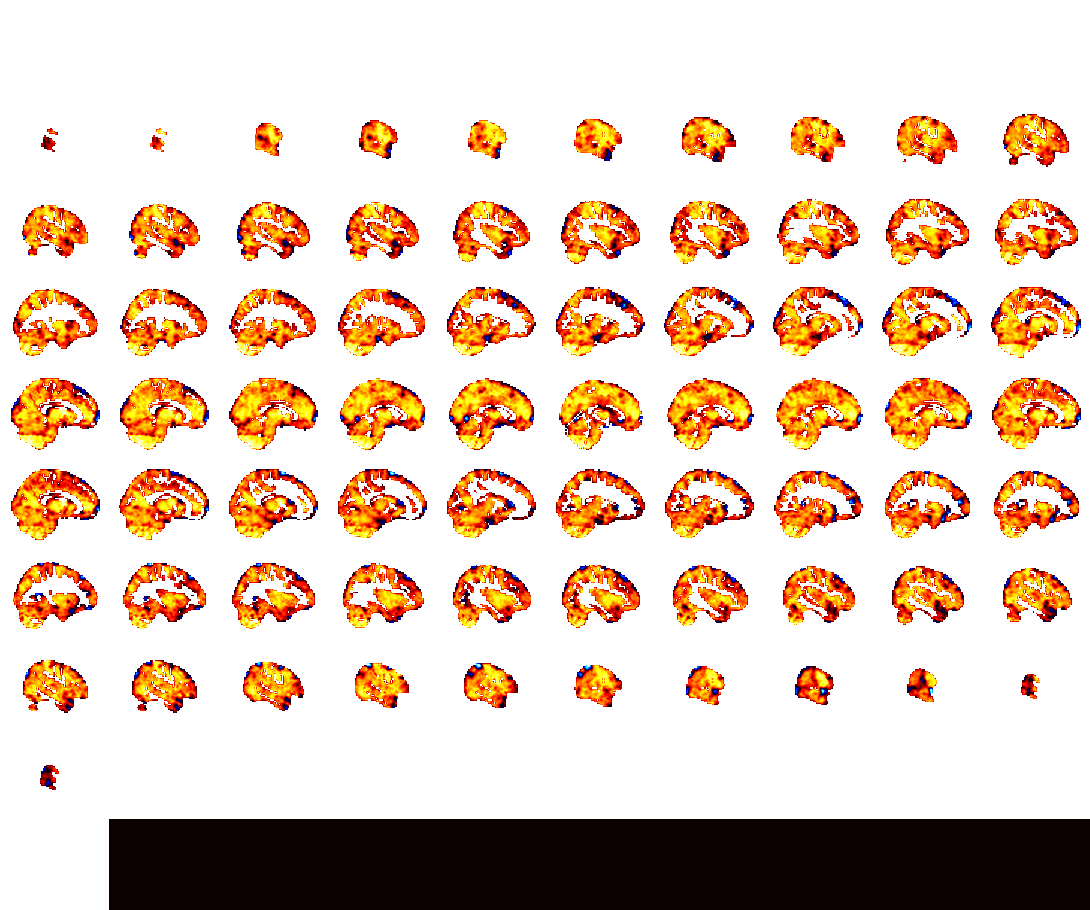

In [12]:
score = model.score(img)
plotting.view_img(score, vmax=1)

We can save the R2 maps as nifti files for further processing or use with Nistats/Nilearn. 